# Trabalho 3: Ajuste e curvas por otimização com restrição

**Para o conjunto de dados disponível no arquivo "Trabalho3dados.xlsx", utilizar otimização por descida de gradiente para encontrar os parâmetros $a$, $b$ e $c$  da função $z=ax^3+by^2+c$, $a,b,c,x,y \in \mathbb{R}$ que ajustam a curva $z(x, y)$ ao conjunto de dados. Testar diferentes funções custo e diferente metódos de normalização de dados.**

### 1. Avaliação dos dados

Primordialmente convém obter os dados os dados relevantes que descrevem a função de ajuste de curva. Assim, é possível garantir que os dados são adequados e confiáveis para o ajuste do modelo. 

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# @brief: importa dados do excel
def GetData():
  df = pd.read_excel("Trabalho3dados.xlsx")
  x = df['x']
  y = df['y']
  z = df['z']
  return(x, y, z)

def ConfGraph3D(ax, x, y, z, title):
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_zlabel(z)
    ax.set_title(title)

# @brief: plota os dados importados 
def PlotData(fig, x, y, z):
  ax = fig.add_subplot(1, 2, 1, projection='3d')
  ax.scatter(x, y, z, c='blue', marker='o')
  ConfGraph3D(ax, 'x', 'y', 'z', "Dados importados")
  return (ax)

### 2. Propor uma estrutura para $h$:

A ideia é encontrar um modelo que seja capaz de capturar as características importantes dos dados de treinamento de forma eficiente e, ao mesmo tempo, seja simples o suficiente para evitar overfitting (ajuste excessivo aos dados de treinamento) e facilitar a interpretação dos resultados.

- O melhor modelo é o mais simples que permite avaliar o fenômeno estudado

In [19]:
def CurveFitFunction(a, b, c):
    x, y, z = GetData()
    return ((a * x**3) + (b * y**2) + c)

### 3. Definir uma medida de erro $J(e)$:

- objetivo é quantificar o quanto o modelo ℎ se desvia das respostas reais $Y_{i}$

- No ajuste de curva busca-se minimizar o erro entre as respostas reais ($Y_{i}$) e as respostas preditas ($\hat{Y}_{i}=h(x_{i})$) , $e_{i}=Y_{i}-\hat{Y}_{i}$. Para isso, precisa-se escolher uma medida de erro $J(e)$ com mínimo definido.

- **Erro Quadrático Médio (MSE):** =$\frac{1}{n}\sum_{i=1}^{n} e_{i}^{2}$

- **Raiz do Erro Quadrático Médio (RMSE):**=$\sqrt{ MSE}$

- **Erro Absoluto Médio (MAE):**=$\frac{1}{n}\sum_{i=1}^{n} \left |  e_{i}\right |$

- **Erro Percentual Absoluto Médio (MAPE)**:=$\frac{100}{n}\sum_{i=1}^{n} \left |  \frac{Yi-\hat{Y}i}{Yi}\right |$ 

In [16]:

#    zPred = CurveFitFunction(x, y, a, b, c)

def CostFunctionMse(zPred, zReal):
    return (np.mean(zPred - zReal)**2)

def CostFunctionRmse(zPred, zReal):
    return (np.sqrt(CostFunctionMse(zPred, zReal)))

def CostFunctionMae(zPred, zReal):
    return (np.mean(np.abs(zPred - zReal)))

def CostFunctionMape(zPred, zReal):
    return (np.mean(np.abs((zPred - zReal) / zReal)) * 100) 


### 4. Aplicar minimização para obter os parâmetros do modelo. 

- Dado o conjunto de dados D={$(x_{1},y_{1}),(x_{2},y_{2}), ..., (x_{n},y_{n})$}, uma estrutura $\hat{Y}=h(x)$ para o modelo com conjunto de parâmetros $W$ e uma medida de erro $E(e)$, com $e_{i}=Y_{i}-\hat{Y}_{i}$, tem-se :

$$
min_{w} E(e) ; \hat{Y}=h(x)
$$

- Como $e=Y-\hat{Y}$, transforma-se o problema de otimização com restrição em um problema irrestrito

$$
 min_{w} E(Y-h(x))
 $$


In [23]:

def Grad(a, b, c, x, y, z):
    dz_da = np.mean(3 * x**3 * (a * x**3 + b * y**2 + c - z))
    dz_db = np.mean(2 * y**2 * (a * x**3 + b * y**2 + c - z))
    dz_dc = np.mean(a * x**3 + b * y**2 + c - z)
    return np.array([dz_da, dz_db, dz_dc])


def GradientDescent(a, b, c, alpha, K, CostFunction):
    x, y, zReal = GetData()
    CostHistory = []
    for k in range(K):
        zPred = CurveFitFunction(a, b, c)
        CostHistory.append(CostFunction(zPred, zReal))
        Gradients  = Grad(a, b, c, x, y, zReal)
        a -= alpha * Gradients[0]
        b -= alpha * Gradients[1]
        c -= alpha * Gradients[2]
    return a, b, c, CostHistory


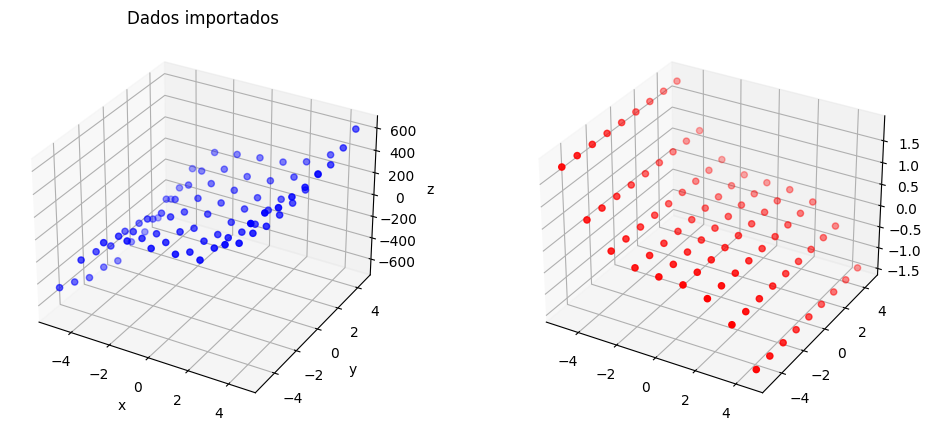

In [31]:

def PlotFigure():
  x, y, z = GetData()
  fig = plt.figure(figsize=(12, 5))
  PlotData(fig, x, y, z)
  plotGradientDescent(fig, x, y, z)

def plotGradientDescent(fig, x, y, z):
  ax = fig.add_subplot(1, 2, 2, projection='3d')
  a_opt, b_opt, c_opt, CostHistory = GradientDescent(1.0, 1.0, 1.0, 0.001, 100, CostFunctionMse)
  z = CurveFitFunction(a_opt, b_opt, c_opt)
  ax.scatter(x, y, z, color='red')

PlotFigure()
